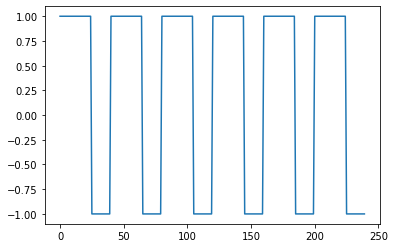

In [27]:
# Question 1.1 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
ONES_DURATION = [15, 20, 25, 15, 20, 25]
N = 240
NUM_SOURCES = 6
tc = []
column_names = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']

for vector_num in range(NUM_SOURCES):
    vector = []
    index = 0
    # adding in 0s while incrementing to arrival 
    while index < AV[vector_num]:
        vector.append(0)
        index += 1
    one_count = 0
    inc_count = 0
    while index < N:
        # resetting counts if an increment has been completed
        if inc_count >= IV[vector_num]:
            inc_count = 0
            one_count = 0
        if one_count < ONES_DURATION[vector_num]:
            vector.append(1)
            one_count += 1
        else:
            vector.append(-1)
        # incrementing counters 
        inc_count += 1
        index += 1   
    # plotting time course
    plt.clf()
    plt.plot(range(len(vector)), vector)
    plt.savefig('../plots/1.1_time_courses/tc_' + str(vector_num + 1) + '.jpeg')
    # mean subtraction followed by division by std dev
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]

    tc.append(vector)

# check matrix 
def check_vector(vector):
    prev_value = vector[0]
    count = 0
    print_list = []
    for val in vector:
        if val == prev_value:
            count += 1
        else:
            print_list.append([count, prev_value])
            count = 1
            prev_value = val
    print(print_list)

# rotating matrix so that a df can be made with dimensions 240 x 6 
tc  = zip(*reversed(tc))
tc_df = pd.DataFrame(tc, columns = column_names)

<Figure size 432x288 with 0 Axes>

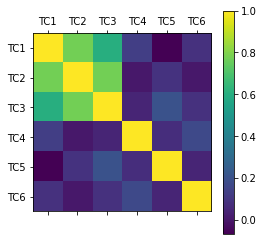

In [28]:
#Question 1.2
plt.clf()
plt.matshow(tc_df.corr())
plt.colorbar()
ticks = [i for i in range(len(tc_df.columns))]
plt.xticks(ticks, tc_df.columns)
plt.yticks(ticks, tc_df.columns)
plt.savefig('../plots/1.2_correlation_matrix/CM.jpeg')

<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

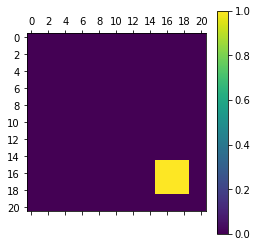

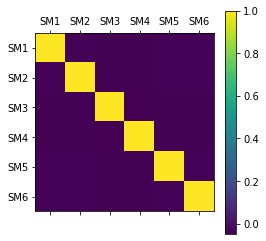

In [29]:
# Question 1.3
tmpSM = []
NUM_MAPS = 6 
MAP_WIDTH = 21
MAP_LENGTH = 21
V = 441
V_SLICE = [[2,6], [2,6], [8,13], [8,13], [15, 19], [15, 19]]
H_SLICE = [[2,6], [15,19], [2,6], [15,19], [2, 6], [15, 19]]

for matrix_num in range(NUM_MAPS):
    # creating blank matrix of 0s 
    matrix = []
    for i in range(MAP_LENGTH):
        row = []
        for j in range(MAP_WIDTH):
            row.append(0)
        matrix.append(row)
    # adding ones 
    for i in range(V_SLICE[matrix_num][0], V_SLICE[matrix_num][1]):
        for j in range(H_SLICE[matrix_num][0], H_SLICE[matrix_num][1]):
            matrix[i][j] = 1
    # plotting map
    plt.clf()
    plt.matshow(matrix)
    plt.colorbar()
    plt.xticks(np.arange(0, MAP_WIDTH+1, 2.0))
    plt.yticks(np.arange(0, MAP_LENGTH+1, 2.0))
    plt.savefig('../plots/1.3_spacial_maps/sm_' + str(matrix_num + 1) + '.jpeg' )

    tmpSM.append(matrix)

# reshaping array
sm = []
for matrix_num in range(NUM_MAPS):
    vector = []
    for row in tmpSM[matrix_num]:
        for val in row:
            vector.append(val)
    sm.append(vector)

sm_df = pd.DataFrame(sm, columns = range(1, V+1))
plt.matshow(sm_df.T.corr())
plt.colorbar()
tick_labels = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']
ticks = [i for i in range(NUM_MAPS)]
plt.xticks(ticks, tick_labels)
plt.yticks(ticks, tick_labels)
plt.savefig('../plots/1.3_spacial_maps/CM.jpeg')

In [ ]:
# Question 1.4
